#Credit Risk Analysis
A comprehensive analysis on a credit risk dataset,
including data exploration, preprocessing, and model building using
various machine learning algorithms

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data=pd.read_csv('/content/credit_risk_dataset.csv')
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
# Data Exploration
data.shape

(32581, 12)

In [ ]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


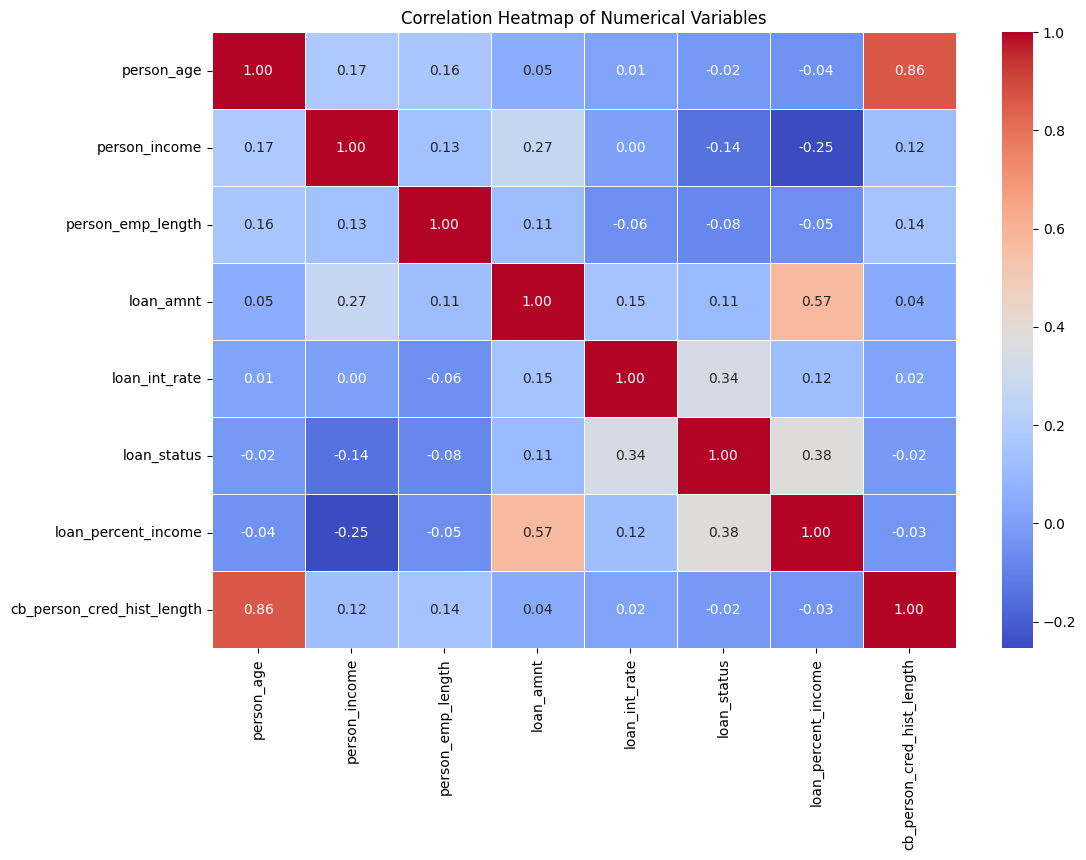

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

<ipython-input-7-db86f83c783c>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)
<ipython-input-7-db86f83c783c>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)
<ipython-input-7-db86f83c783c>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)
<ipython-input-7-db86f83c783c>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)
<ipython-input-7-db86f83c783c>:6: FutureWarning: 

`shade` is now deprecated in 

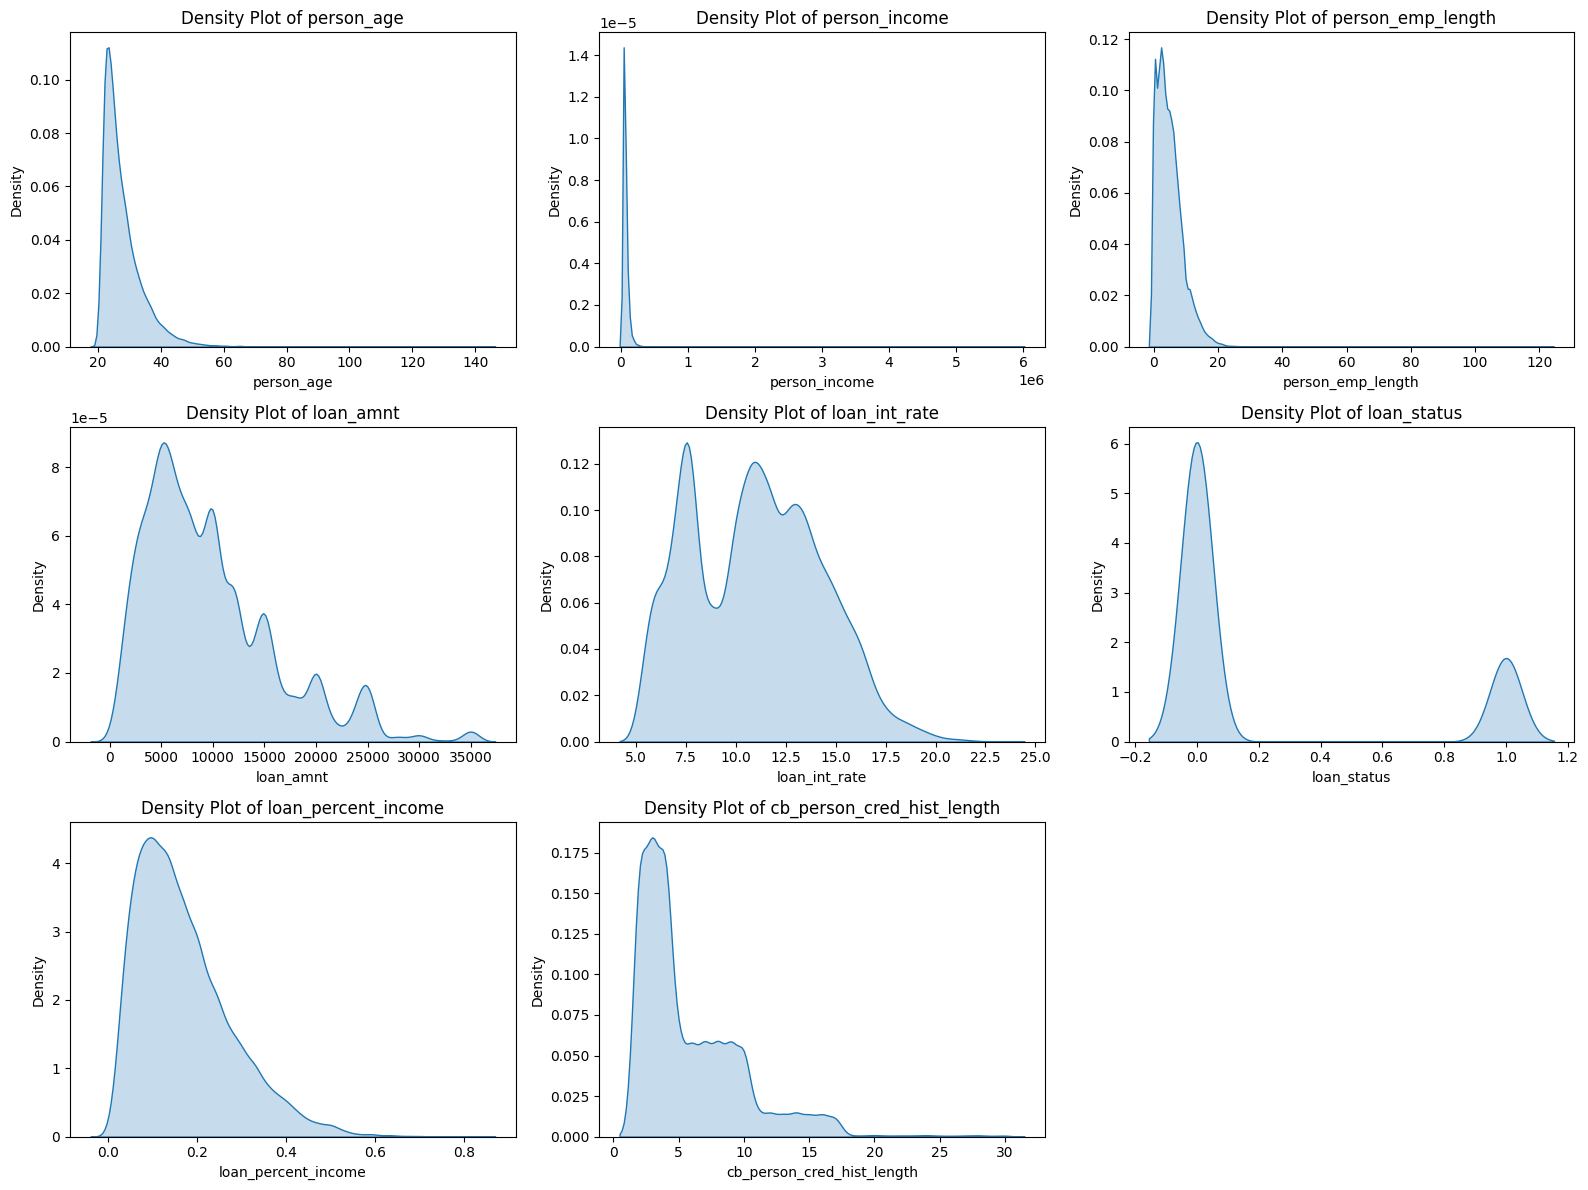

In [ ]:
# Plot density plots for each numerical column
plt.figure(figsize=(16, 12))  # Adjust the figure size for better readability

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)  # Arrange subplots in a grid
    sns.kdeplot(data[column], shade=True)
    plt.title(f'Density Plot of {column}')

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

<ipython-input-8-b4b95a0df870>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=data, palette='viridis')
<ipython-input-8-b4b95a0df870>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=data, palette='viridis')
<ipython-input-8-b4b95a0df870>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=data, palette='viridis')
<ipython-input-8-b4b95a0df870>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `

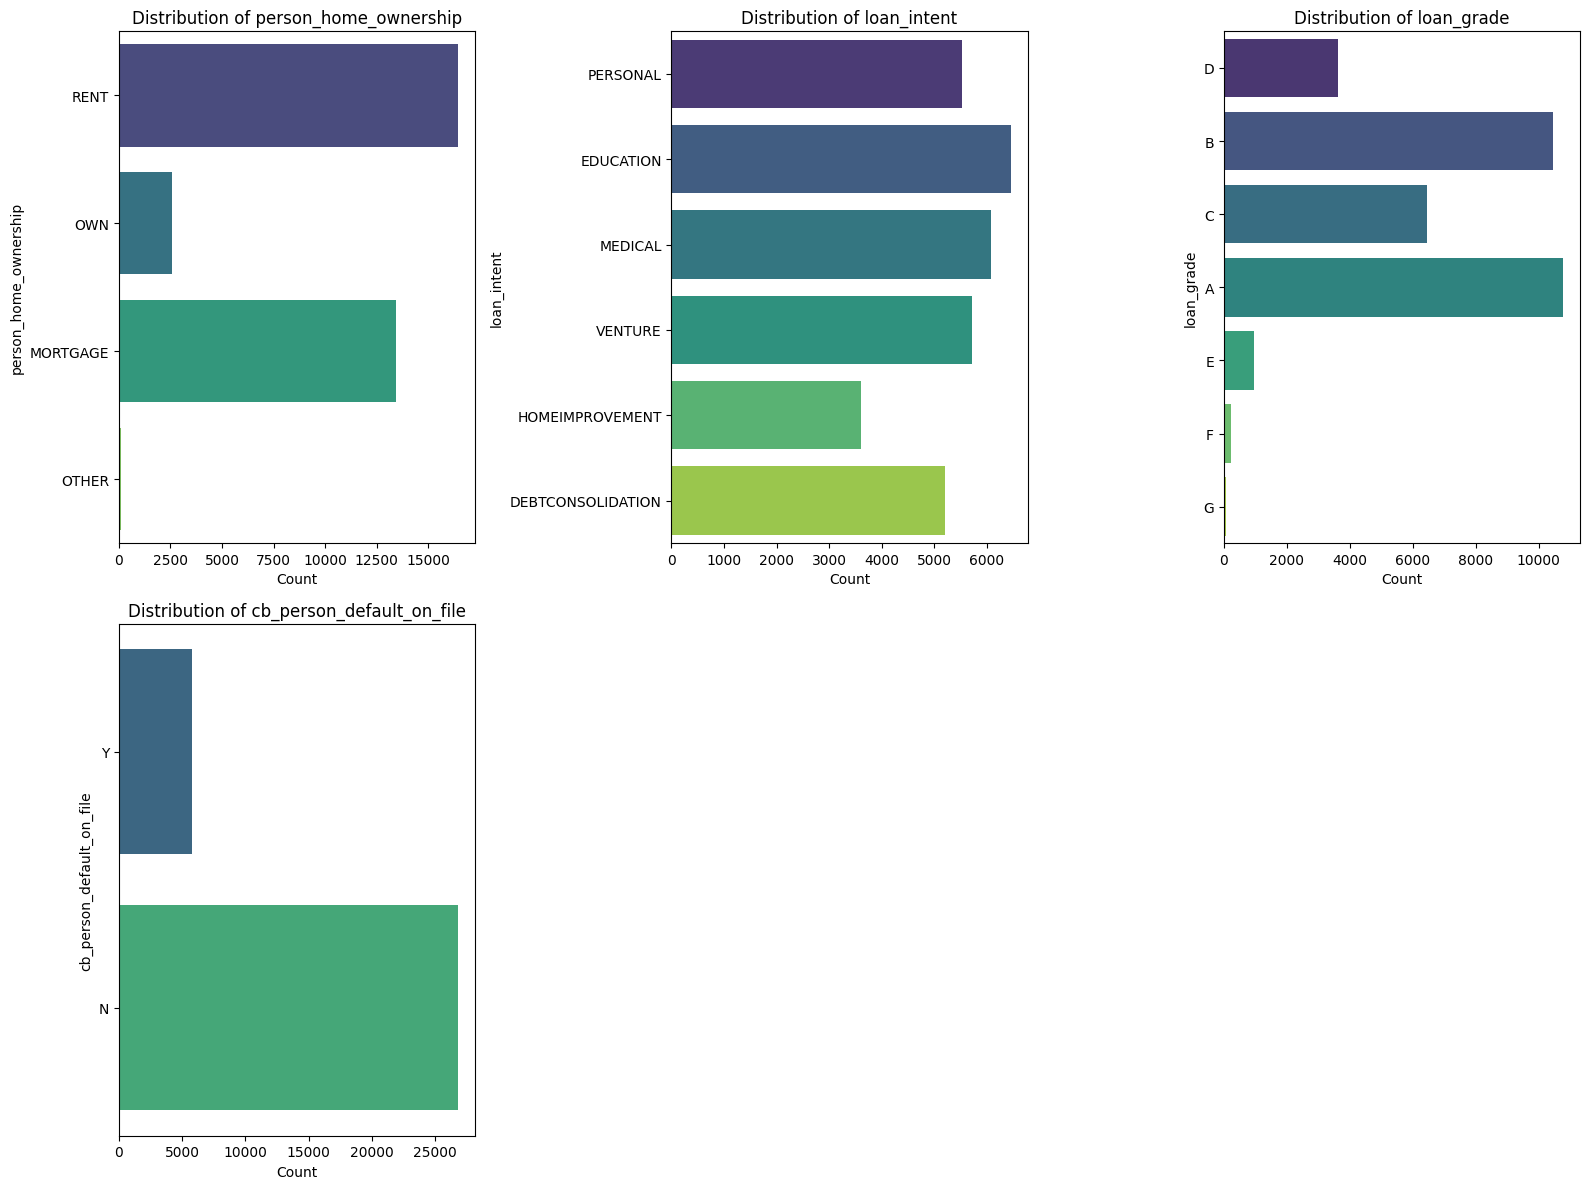

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns

# Plot bar plots for each categorical column
plt.figure(figsize=(16, 12))  # Adjust the figure size for better readability

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 3 + 1, 3, i)  # Arrange subplots in a grid
    sns.countplot(y=column, data=data, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)


plt.tight_layout()
plt.show()

Most people either rents house or has a morgage. And most people falls in A or B category of loan grade.

In [ ]:
data.isnull().sum()/ len(data) * 100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

Missing percent is low hence person_emp_length can be dropped.

In [ ]:
df=data.dropna(subset=['person_emp_length'])

Loan int rate somewhat has a normal distribution. Hence replacing with mean.

In [ ]:
df=df.fillna(df['loan_int_rate'].mean())

In [ ]:
df.isnull().sum()/ len(data) * 100

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

In [ ]:
#dropping age above 80
df = df.drop(df[df['person_age'] > 80].index, axis=0)


In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


In [ ]:
#Adding new features
# Create loan-to-income ratio
df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']

# Create loan-to-employment length ratio
df['loan_to_emp_length_ratio'] =  df['person_emp_length']/ df['loan_amnt']

# Create interest rate-to-loan amount ratio
df['int_rate_to_loan_amt_ratio'] = df['loan_int_rate'] / df['loan_amnt']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Encode categorical variables

categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df = pd.get_dummies(df, columns=categorical_columns)



In [ ]:
#Data for training
X = df.drop(['loan_status'], axis=1)
Y = df['loan_status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(x_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Random Forest Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Define the parameter grid for Gradient Boosting
gbc_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize Grid Search for Gradient Boosting
gbc_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gbc_param_grid, cv=5, n_jobs=-1, verbose=2)
gbc_grid_search.fit(x_train, y_train)
best_gbc_model = gbc_grid_search.best_estimator_
print(f"Best Gradient Boosting Parameters: {gbc_grid_search.best_params_}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [ ]:
# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}

# Initialize Grid Search for XGBoost
xgb_grid_search = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), xgb_param_grid, cv=5, n_jobs=-1, verbose=2)
xgb_grid_search.fit(x_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_
print(f"Best XGBoost Parameters: {xgb_grid_search.best_params_}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Evaluate Random Forest model
print("Random Forest Model:")
evaluate_model(best_rf_model, x_test, y_test)

# Evaluate XGBoost model
print("\nXGBoost Model:")
evaluate_model(best_xgb_model, x_test, y_test)

# Evaluate Gradient Boosting model
print("\nGradient Boosting Model:")
evaluate_model(best_gbc_model, x_test, y_test)


Random Forest Model:
Accuracy: 0.9341856060606061
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4971
           1       0.96      0.73      0.83      1365

    accuracy                           0.93      6336
   macro avg       0.94      0.86      0.89      6336
weighted avg       0.94      0.93      0.93      6336

[[4929   42]
 [ 375  990]]

XGBoost Model:
Accuracy: 0.936395202020202
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4971
           1       0.96      0.74      0.83      1365

    accuracy                           0.94      6336
   macro avg       0.95      0.86      0.90      6336
weighted avg       0.94      0.94      0.93      6336

[[4929   42]
 [ 361 1004]]

Gradient Boosting Model:
Accuracy: 0.9403409090909091
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4971
           1       0.96      0.76 

In [ ]:
# Create an ensemble model using VotingClassifier with the best models
ensemble_model = VotingClassifier(estimators=[
    ('rf', best_rf_model),
    ('xgb', best_xgb_model),
    ('gbc', best_gbc_model)
], voting='hard')

# Train the ensemble model
ensemble_model.fit(x_train, y_train)

# Evaluate the ensemble model
print("\nEnsemble Model:")
evaluate_model(ensemble_model, x_test, y_test)



Ensemble Model:
Accuracy: 0.9379734848484849
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4971
           1       0.97      0.74      0.84      1365

    accuracy                           0.94      6336
   macro avg       0.95      0.86      0.90      6336
weighted avg       0.94      0.94      0.93      6336

[[4938   33]
 [ 360 1005]]
